<a href="https://colab.research.google.com/github/clobos/Bioestatistica_ESALQ_Python_2025/blob/main/Aula04_Bioestatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear simples — teoria, estimação, correlação de Pearson (com Python e dados biológicos)

## Modelo e suposições
Regressão linear simples (RLS):
$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,\quad i=1,\ldots,n,
$$
com $\mathbb{E}[\varepsilon_i]=0$, $\mathrm{Var}(\varepsilon_i)=\sigma^2$ (homocedasticidade) e independência. Sob normalidade $\varepsilon_i\sim\mathcal N(0,\sigma^2)$, os MQO coincidem com os MLEs; sem normalidade, MQO é BLUE (Gauss–Markov).

## Estimação por mínimos quadrados ordinários (MQO)
Notação matricial $\mathbf{X}=\begin{bmatrix}\mathbf{1}&\mathbf{x}\end{bmatrix}\$:

$$
\hat{\boldsymbol\beta} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y},
\qquad
\mathrm{Var}(\hat{\boldsymbol\beta}) = \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}.
$$

Forma escalar (com $\bar x, \bar y$ e somas de quadrados):
$$
S_{xx}=\sum_{i=1}^n (x_i-\bar x)^2,\quad
S_{xy}=\sum_{i=1}^n (x_i-\bar x)(y_i-\bar y),\quad
S_{yy}=\sum_{i=1}^n (y_i-\bar y)^2.
$$
Estimadores fechados:
$$
\hat\beta_1=\frac{S_{xy}}{S_{xx}},\qquad
\hat\beta_0=\bar y-\hat\beta_1\,\bar x.
$$

**Resíduos e variância do erro.** Resíduos $e_i=y_i-\hat y_i$ com $\hat y_i=\hat\beta_0+\hat\beta_1 x_i$.  
$$
\mathrm{RSS}=\sum_{i=1}^n e_i^2,\qquad
\hat\sigma^2=\frac{\mathrm{RSS}}{n-2}.
$$
**Erros-padrão:**
$$
\mathrm{SE}(\hat\beta_1)=\sqrt{\frac{\hat\sigma^2}{S_{xx}}},\qquad
\mathrm{SE}(\hat\beta_0)=\sqrt{\hat\sigma^2\!\left(\frac{1}{n}+\frac{\bar x^2}{S_{xx}}\right)}.
$$
Sob normalidade:
$$
\frac{\hat\beta_j-\beta_j}{\mathrm{SE}(\hat\beta_j)}\sim t_{n-2},\quad j\in\{0,1\}.
$$

**Decomposição e $R^2$.**
$$
\mathrm{TSS}=\sum (y_i-\bar y)^2,\quad
\mathrm{ESS}=\sum (\hat y_i-\bar y)^2,\quad
\mathrm{RSS}=\sum (y_i-\hat y_i)^2,\quad
\mathrm{TSS}=\mathrm{ESS}+\mathrm{RSS},\quad
R^2=1-\frac{\mathrm{RSS}}{\mathrm{TSS}}.
$$

## Inferência e predição
Para $x_0$:
$$
\hat y(x_0)=\hat\beta_0+\hat\beta_1 x_0,
\quad
\mathrm{SE}_{\text{média}}(x_0)=\sqrt{\hat\sigma^2\!\left(\frac{1}{n}+\frac{(x_0-\bar x)^2}{S_{xx}}\right)},
$$
$$
\mathrm{SE}_{\text{pred}}(x_0)=\sqrt{\hat\sigma^2\!\left(1+\frac{1}{n}+\frac{(x_0-\bar x)^2}{S_{xx}}\right)}.
$$
Intervalos:
$$
\text{IC da média: }\ \hat y(x_0)\pm t_{n-2,\,1-\alpha/2}\,\mathrm{SE}_{\text{média}}(x_0),\qquad
\text{IP: }\ \hat y(x_0)\pm t_{n-2,\,1-\alpha/2}\,\mathrm{SE}_{\text{pred}}(x_0).
$$

## Diagnóstico: matriz chapéu, alavancagem e resíduos
Matriz chapéu:
$$
\mathbf{H}=\mathbf{X}(\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top,\quad
\mathbf{e}=\mathbf{y}-\hat{\mathbf{y}}=(\mathbf{I}-\mathbf{H})\mathbf{y}.
$$
Alavancagem $h_{ii}=[\mathbf{H}]_{ii}$. Regra prática: $h_{ii}>2p/n$ (ou $3p/n$), com $p$ parâmetros (na RLS, $p=2$).

**Resíduos studentizados.**
$$
r_i^{(\text{int})}=\frac{e_i}{\hat\sigma\sqrt{1-h_{ii}}}\quad(\text{interno}),$$
$$
t_i=\frac{e_i}{\hat\sigma_{(i)}\sqrt{1-h_{ii}}}\quad(\text{externo}),
$$
onde $\hat\sigma_{(i)}$ é estimada sem o ponto $i$.

**Distância de Cook (influência).**
$$
D_i=\frac{e_i^2}{p\,\hat\sigma^2}\cdot\frac{h_{ii}}{(1-h_{ii})^2}
=\frac{t_i^{\,2}}{p}\cdot\frac{h_{ii}}{1-h_{ii}}.
$$
Regra prática: $D_i>4/n$ sugere influência elevada.

## Correlação de Pearson e ligação com a RLS
Correlação amostral:
$$
r=\frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}\in[-1,1].
$$
Na RLS com intercepto:
$$
\hat\beta_1=r\,\frac{s_y}{s_x},\qquad R^2=r^2,
$$
com $s_x^2=S_{xx}/(n-1)$ e $s_y^2=S_{yy}/(n-1)$.  
$r=0$ indica ausência de **associação linear** (pode haver não linearidade).

## Outros métodos (panorama)
Sob normalidade, MLE = MQO. Alternativas: estimadores robustos (Huber, Tukey), LAD/L1, TLS (erro em X e Y), regularização (ridge, lasso).

## Referências
- Montgomery, D. C., Peck, E. A., & Vining, G. G. (2021). *Introduction to Linear Regression Analysis* (6th ed.). Wiley.  
- Cook, R. D., & Weisberg, R. (1982). *Residuals and Influence in Regression*. Chapman & Hall.  
- Belsley, D. A., Kuh, E., & Welsch, R. E. (1980). *Regression Diagnostics*. Wiley.  
- Fox, J. (2016). *Applied Regression Analysis and GLMs* (3rd ed.). Sage.  
- Seber, G. A. F., & Lee, A. J. (2012). *Linear Regression Analysis* (2nd ed.). Wiley.  
- NIST/SEMATECH *e-Handbook of Statistical Methods* (capítulos de regressão e diagnóstico).


# Importação das bibliotecas a serem usadas



In [ ]:
import sys, subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

# Garante scipy e statsmodels (geralmente já existem no Colab)
try:
    import scipy.stats as st
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "scipy"])
    import scipy.stats as st

try:
    import statsmodels.api as sm
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "statsmodels"])
    import statsmodels.api as sm


# SIMULAÇÃO DE DADOS (BIOLOGIA)


In [84]:
np.random.seed(42)
n = 80

# "x" = dose de fertilizante NPK (g por vaso), criativamente variada
dose = np.random.uniform(0, 10, size=n)

# Variáveis categóricas adicionais (enriquecem o CSV)
variedades = np.random.choice(["Roma", "Cereja", "Caqui", "Santa Clara"], size=n, p=[0.25, 0.35, 0.20, 0.20])
estufa = np.random.choice(["A", "B"], size=n)
id_planta = np.arange(1, n+1)

# Modelo verdadeiro: altura (cm) após 30 dias
beta0_true = 15.0
beta1_true = 2.5
sigma_true = 3.0
altura = beta0_true + beta1_true * dose + np.random.normal(0, sigma_true, size=n)

df = pd.DataFrame({
    "id_planta": id_planta,
    "estufa": estufa,
    "variedade": variedades,
    "dose_fertilizante_g": dose,
    "altura_cm": altura
})

csv_path = "biologia_regressao.csv"
df.to_csv(csv_path, index=False)
print(f"CSV salvo em: {csv_path}")
display(df.head())

CSV salvo em: biologia_regressao.csv


,id_planta,estufa,variedade,dose_fertilizante_g,altura_cm
0,1,B,Santa Clara,3.745401,22.323429
1,2,A,Caqui,9.507143,39.464619
2,3,B,Cereja,7.319939,34.179066
3,4,B,Roma,5.986585,27.823408
4,5,B,Cereja,1.560186,24.497790


# 2) MQO "NA MÃO" (Regressão Linear Simples)

In [ ]:
def ols_simples(x, y):
    """
    Estima Y = b0 + b1*X + erro via MQO, com cálculos passo a passo.
    Retorna um dicionário com estatísticas relevantes.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x)
    xbar = x.mean()
    ybar = y.mean()
    Sxx = np.sum((x - xbar)**2)
    Sxy = np.sum((x - xbar)*(y - ybar))
    Syy = np.sum((y - ybar)**2)

    b1 = Sxy / Sxx
    b0 = ybar - b1 * xbar # Calculate the intercept b0

    # Calculate residuals, fitted values, and sum of squared errors
    y_hat = b0 + b1 * x
    residuos = y - y_hat
    SSE = np.sum(residuos**2)
    SSR = np.sum((y_hat - ybar)**2)
    SST = Syy # SSE + SSR
    s2 = SSE / (n - 2) # Estimate of the error variance
    se_b1 = np.sqrt(s2 / Sxx) # Standard error of b1
    se_b0 = np.sqrt(s2 * (1.0/n + xbar**2 / Sxx)) # Standard error of b0
    r_squared = SSR / SST if SST > 0 else 0 # R-squared

    return {
        "n": n,
        "xbar": xbar,
        "ybar": ybar,
        "Sxx": Sxx,
        "Sxy": Sxy,
        "Syy": Syy,
        "b0": b0,
        "b1": b1,
        "SSE": SSE,
        "SSR": SSR,
        "SST": SST,
        "s2": s2,
        "se_b0": se_b0,
        "se_b1": se_b1,
        "r_squared": r_squared
    }



In [ ]:
res = ols_simples(df["dose_fertilizante_g"].values,df["altura_cm"].values )

print("\n=== Resultados da Regressão OLS (manual) ===")
for key, value in res.items():
    if isinstance(value, (int, np.integer)):
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:.3f}")


=== Resultados da Regressão OLS (manual) ===
n: 80
xbar: 4.659
ybar: 27.047
Sxx: 738.243
Sxy: 1777.908
Syy: 4991.878
b0: 15.827
b1: 2.408
SSE: 710.146
SSR: 4281.732
SST: 4991.878
s2: 9.104
se_b0: 0.618
se_b1: 0.111
r_squared: 0.858


# 3) COMPARAÇÃO COM FUNÇÃO PRONTA (statsmodels)

In [ ]:
X = sm.add_constant(df["dose_fertilizante_g"].values)
model = sm.OLS(df["altura_cm"].values, X).fit()
print("\n=== Comparação com statsmodels.OLS ===")
print("Parâmetros (const, dose):", model.params)
print("Erro-padrão:", model.bse)
print("R²:", model.rsquared)
print(model.summary())  # resumo completo




=== Comparação com statsmodels.OLS ===
Parâmetros (const, dose): [15.82667074  2.40829786]
Erro-padrão: [0.61764769 0.11105217]
R²: 0.8577396847217742
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     470.3
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           9.06e-35
Time:                        20:46:35   Log-Likelihood:                -200.85
No. Observations:                  80   AIC:                             405.7
Df Residuals:                      78   BIC:                             410.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

# 4) PREDIÇÕES PARA ALGUNS VALORES DE x

In [ ]:
def prever_ols_simples(res_ols, x0, alpha=0.05):
    """
    Predições em x0: média prevista, IC da média e intervalo de predição.
    Usa t-Student com df=n-2 (SciPy). Caso SciPy indisponível, usa 1.96 (aprox. Normal).
    """
    x0 = np.asarray(x0, dtype=float)
    n = res_ols["n"]
    xbar = res_ols["xbar"]
    Sxx = res_ols["Sxx"]
    b0 = res_ols["b0"]
    b1 = res_ols["b1"]
    s2 = res_ols["s2"]

    try:
        tcrit = st.t.ppf(1 - alpha/2, df=n-2)
    except Exception:
        tcrit = 1.96

    medias = b0 + b1 * x0
    se_mean = np.sqrt(s2 * (1.0/n + (x0 - xbar)**2 / Sxx))
    se_pred = np.sqrt(s2 * (1.0 + 1.0/n + (x0 - xbar)**2 / Sxx))

    IC_mean = np.column_stack([medias - tcrit*se_mean, medias + tcrit*se_mean])
    IP_pred = np.column_stack([medias - tcrit*se_pred, medias + tcrit*se_pred])

    out = pd.DataFrame({
        "x0": x0,
        "y_hat": medias,
        "IC_mean_low": IC_mean[:,0],
        "IC_mean_high": IC_mean[:,1],
        "IP_pred_low": IP_pred[:,0],
        "IP_pred_high": IP_pred[:,1],
    })
    return out



In [ ]:
x0_vals = np.array([0, 2.5, 5.0, 7.5, 10.0])
preds = prever_ols_simples(res, x0_vals)
print("\n=== Predições (média, IC da média e intervalo de predição) ===")
print(preds.to_string(index=False, float_format='%.3f'))


=== Predições (média, IC da média e intervalo de predição) ===
    x0  y_hat  IC_mean_low  IC_mean_high  IP_pred_low  IP_pred_high
 0.000 15.827       14.597        17.056        9.695        21.958
 2.500 21.847       21.023        22.671       15.784        27.911
 5.000 27.868       27.192        28.544       21.823        33.913
 7.500 33.889       32.969        34.808       27.812        39.966
10.000 39.910       38.551        41.268       33.751        46.068


# 5) GRÁFICO: DISPERSÃO + RETA AJUSTADA

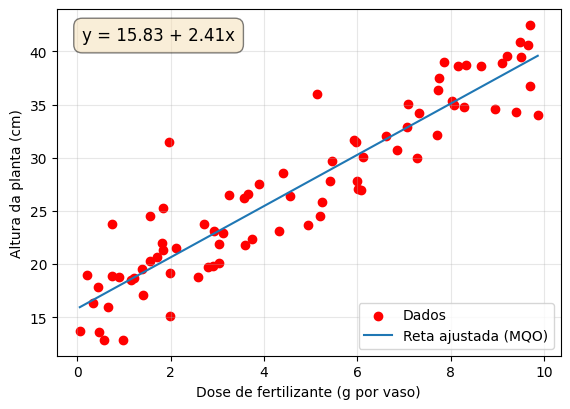

In [86]:
plt.figure(figsize=(6.5,4.5))
plt.scatter(df["dose_fertilizante_g"], df["altura_cm"], label="Dados", color="red")
x_plot = np.linspace(df["dose_fertilizante_g"].min(), df["dose_fertilizante_g"].max(), 200)
y_plot = res["b0"] + res["b1"] * x_plot
plt.plot(x_plot, y_plot, label="Reta ajustada (MQO)")

# Add the equation of the line
equation = f'y = {res["b0"]:.2f} + {res["b1"]:.2f}x'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.xlabel("Dose de fertilizante (g por vaso)")
plt.ylabel("Altura da planta (cm)")
plt.title("")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [88]:
#res['b0']

np.float64(15.826670736075938)

# 6) CORRELAÇÃO DE PEARSON: FUNÇÃO 'NA MÃO'

In [ ]:
def pearson_r_na_mao(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    xbar = x.mean()
    ybar = y.mean()
    Sxx = np.sum((x - xbar)**2)
    Syy = np.sum((y - ybar)**2)
    Sxy = np.sum((x - xbar)*(y - ybar))
    return Sxy / sqrt(Sxx * Syy)



In [89]:
r_manual = pearson_r_na_mao(df["dose_fertilizante_g"], df["altura_cm"])
r_numpy = np.corrcoef(df["dose_fertilizante_g"], df["altura_cm"])[0,1]
print("\n=== Correlação de Pearson ===")
print(f"r (na mão)  = {r_manual:.3f}")
print(f"r (NumPy)   = {r_numpy:.3f}")


=== Correlação de Pearson ===
r (na mão)  = 0.926
r (NumPy)   = 0.926


# 7) DEMONSTRAÇÃO GRÁFICA: r=1, r=-1, r≈0

In [ ]:
m = 50
x_demo = np.linspace(0, 1, m)
print(x_demo )

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


# r = +1 (reta crescente sem ruído)

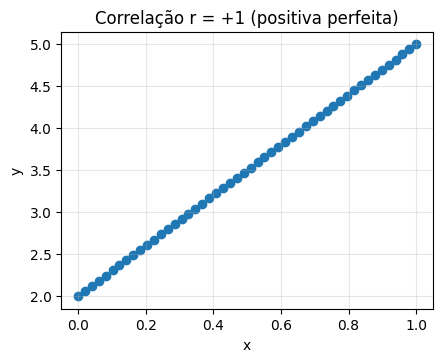

r=+1 (exato): 1.0


In [ ]:
y_pos = 2 + 3 * x_demo
plt.figure(figsize=(4.8,3.6))
plt.scatter(x_demo, y_pos)
plt.title("Correlação r = +1 (positiva perfeita)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()
print("r=+1 (exato):", pearson_r_na_mao(x_demo, y_pos))

# r = -1 (reta decrescente sem ruído)

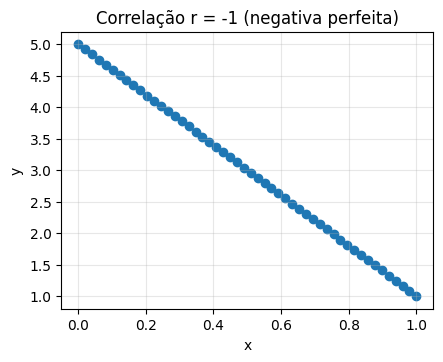

r=-1 (exato): -1.0


In [ ]:
y_neg = 5 - 4 * x_demo
plt.figure(figsize=(4.8,3.6))
plt.scatter(x_demo, y_neg)
plt.title("Correlação r = -1 (negativa perfeita)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()
print("r=-1 (exato):", pearson_r_na_mao(x_demo, y_neg))

# r ≈ 0 (sem associação linear)

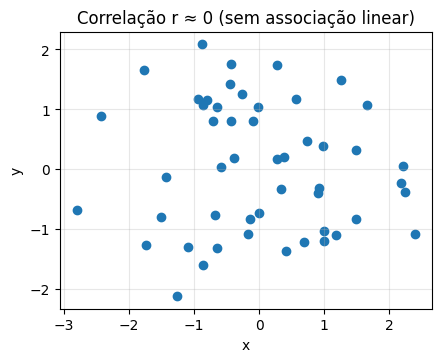

r≈0 (simulado): -0.08524059160268602


In [ ]:
np.random.seed(123)
x_zero = np.random.normal(0, 1, size=m)
y_zero = np.random.normal(0, 1, size=m)
plt.figure(figsize=(4.8,3.6))
plt.scatter(x_zero, y_zero)
plt.title("Correlação r ≈ 0 (sem associação linear)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()
print("r≈0 (simulado):", pearson_r_na_mao(x_zero, y_zero))


# Adicional (Aprender se tiver coragem!!!)

# Diagnóstico de resíduos

In [ ]:
import sys, subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Garantir pacotes
try:
    import scipy.stats as st
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "scipy"])
    import scipy.stats as st

try:
    import statsmodels.api as sm
    import statsmodels.stats.api as sms
    from statsmodels.graphics.gofplots import qqplot
    from statsmodels.graphics.regressionplots import influence_plot
    from statsmodels.stats.diagnostic import het_breuschpagan, het_white, linear_rainbow
    from statsmodels.stats.stattools import durbin_watson, jarque_bera
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "statsmodels"])
    import statsmodels.api as sm
    import statsmodels.stats.api as sms
    from statsmodels.graphics.gofplots import qqplot
    from statsmodels.graphics.regressionplots import influence_plot
    from statsmodels.stats.diagnostic import het_breuschpagan, het_white, linear_rainbow
    from statsmodels.stats.stattools import durbin_watson, jarque_bera

# --- Caso df não exista no ambiente, simula o mesmo conjunto da etapa anterior ---
if 'df' not in globals():
    np.random.seed(42)
    n = 80
    dose = np.random.uniform(0, 10, size=n)
    variedades = np.random.choice(["Roma", "Cereja", "Caqui", "Santa Clara"], size=n, p=[0.25, 0.35, 0.20, 0.20])
    estufa = np.random.choice(["A", "B"], size=n)
    id_planta = np.arange(1, n+1)
    beta0_true = 15.0
    beta1_true = 2.5
    sigma_true = 3.0
    altura = beta0_true + beta1_true * dose + np.random.normal(0, sigma_true, size=n)
    df = pd.DataFrame({
        "id_planta": id_planta,
        "estufa": estufa,
        "variedade": variedades,
        "dose_fertilizante_g": dose,
        "altura_cm": altura
    })

# --- Ajuste OLS (com intercepto) ---
y = df["altura_cm"].values
X = sm.add_constant(df["dose_fertilizante_g"].values)  # coluna de 1's + dose
ols = sm.OLS(y, X).fit()

print("Resumo curto do ajuste:")
print("Parâmetros (const, dose):", ols.params)
print("R²:", ols.rsquared)



Resumo curto do ajuste:
Parâmetros (const, dose): [15.82667074  2.40829786]
R²: 0.8577396847217742


# 1) RESÍDUOS, VALORES AJUSTADOS E MÉTRICAS DE INFLUÊNCIA

In [ ]:
resid = ols.resid
fitted = ols.fittedvalues
influence = ols.get_influence()
hii = influence.hat_matrix_diag                         # alavancagem h_ii
rstud_int = influence.resid_studentized_internal        # resíduos studentizados internos
rstud_ext = influence.resid_studentized_external        # resíduos studentizados externos
cooks_d, _ = influence.cooks_distance                   # distância de Cook

n = X.shape[0]
p = X.shape[1]   # nº de parâmetros (p=2 no SLR)
lev_threshold = 2*p/n
cook_threshold = 4/n

print("\nLimiares usuais:")
print(f" - Alavancagem alta se h_ii > {lev_threshold:.3f} (regra 2p/n)")
print(f" - Cook alto se D_i > {cook_threshold:.3f} (regra 4/n)")

idx_lev = np.where(hii > lev_threshold)[0]
idx_cook = np.where(cooks_d > cook_threshold)[0]
print(f"Índices com alavancagem alta: {idx_lev.tolist()}")
print(f"Índices com Cook alto: {idx_cook.tolist()}")




Limiares usuais:
 - Alavancagem alta se h_ii > 0.050 (regra 2p/n)
 - Cook alto se D_i > 0.050 (regra 4/n)
Índices com alavancagem alta: []
Índices com Cook alto: [37, 57, 68, 69]


# 2) GRÁFICOS DIAGNÓSTICOS (um por figura)


## 2.1 Resíduos vs Ajustados (homocedasticidade/linearidade)

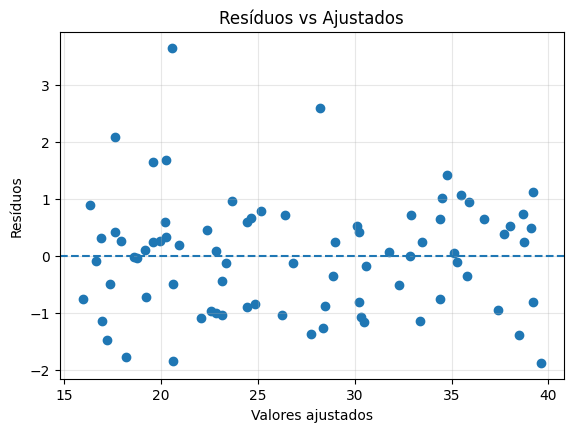

In [ ]:
plt.figure(figsize=(6.5,4.5))
plt.scatter(fitted, rstud_int)
plt.axhline(0, linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados")
plt.grid(alpha=0.3)
plt.show()



<Figure size 600x600 with 0 Axes>

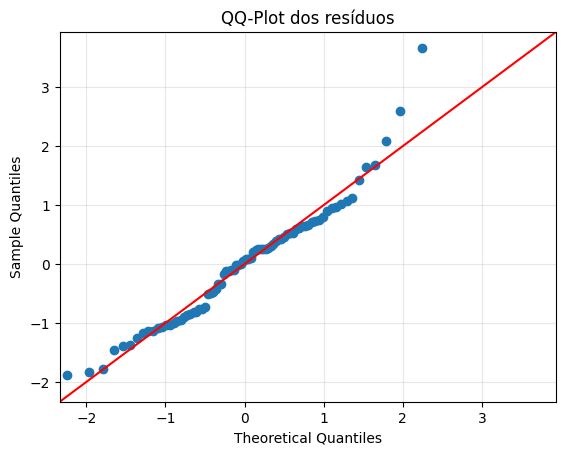

In [ ]:
# 2.2 QQ-Plot (normalidade dos resíduos)
plt.figure(figsize=(6,6))
qqplot(rstud_int, line="45", fit=True)
plt.title("QQ-Plot dos resíduos")
plt.grid(alpha=0.3)
plt.show()



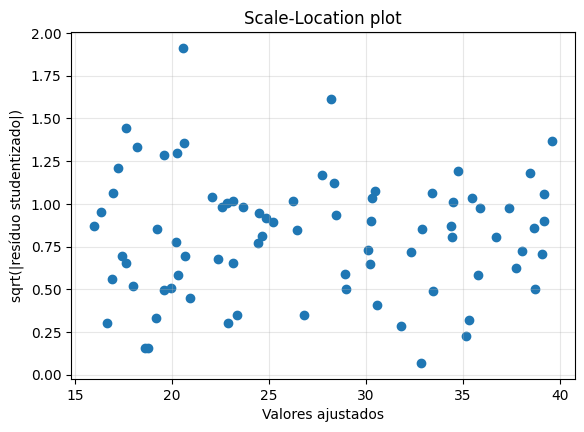

In [ ]:
# 2.3 Scale-Location: sqrt(|resíduo studentizado|) vs ajustado
plt.figure(figsize=(6.5,4.5))
plt.scatter(fitted, np.sqrt(np.abs(rstud_int)))
plt.xlabel("Valores ajustados")
plt.ylabel("sqrt(|resíduo studentizado|)")
plt.title("Scale-Location plot")
plt.grid(alpha=0.3)
plt.show()



<Figure size 650x450 with 0 Axes>

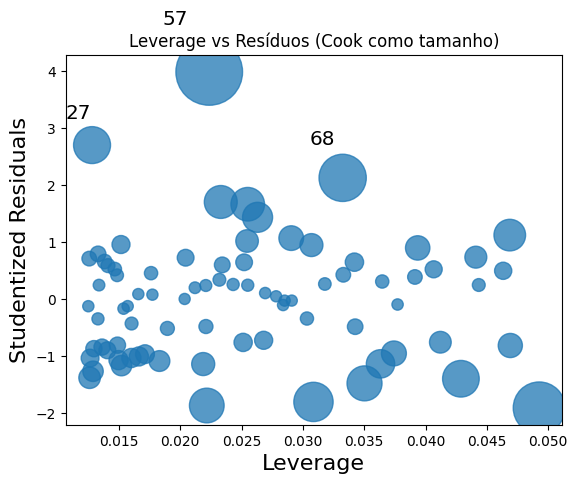

In [ ]:
# 2.4 Leverage vs Residuals (influence plot com Cook)
plt.figure(figsize=(6.5,4.5))
influence_plot(ols, criterion="cooks")  # mostra h_ii e resíduos studentizados; tamanho ∝ Cook
plt.title("Leverage vs Resíduos (Cook como tamanho)")
plt.show()



In [ ]:
# ============================================================
# 3) TESTES FORMAIS
# ============================================================

# 3.1 Normalidade (Shapiro-Wilk e Jarque-Bera)
sw_stat, sw_p = st.shapiro(resid)
jb_stat, jb_pvalue, jb_skew, jb_kurt = jarque_bera(resid)
print("\nNormalidade dos resíduos:")
print(f" - Shapiro-Wilk: estat={sw_stat:.4f}, p-valor={sw_p:.4g}")
print(f" - Jarque-Bera:  estat={jb_stat:.4f}, p-valor={jb_pvalue:.4g}")




Normalidade dos resíduos:
 - Shapiro-Wilk: estat=0.9612, p-valor=0.01597
 - Jarque-Bera:  estat=10.8368, p-valor=0.004434


In [ ]:
# 3.2 Homocedasticidade (Breusch–Pagan e White)
bp_stat, bp_p, _, _ = het_breuschpagan(resid, X)           # usa [const, x]
w_stat, w_p = het_white(resid, X)[:2]
print("\nHomocedasticidade:")
print(f" - Breusch–Pagan: estat={bp_stat:.4f}, p-valor={bp_p:.4g}")
print(f" - White:         estat={w_stat:.4f}, p-valor={w_p:.4g}")




Homocedasticidade:
 - Breusch–Pagan: estat=0.8781, p-valor=0.3487
 - White:         estat=0.9110, p-valor=0.6341


In [ ]:
# 3.3 Independência (Durbin–Watson)
dw = durbin_watson(resid)
print("\nIndependência:")
print(f" - Durbin–Watson: {dw:.4f} (≈2 sugere ausência de autocorrelação)")




Independência:
 - Durbin–Watson: 2.0196 (≈2 sugere ausência de autocorrelação)


In [ ]:
# 3.4 Linearidade (Rainbow test)
rb_F, rb_p = linear_rainbow(ols)
print("\nLinearidade (Rainbow):")
print(f" - F={rb_F:.4f}, p-valor={rb_p:.4g}")




Linearidade (Rainbow):
 - F=0.8207, p-valor=0.7309


# Como definir uma função em Python

In [74]:
def criar_funcao_linear(a, b):
  """
  Cria uma função linear y = a*x + b com os parâmetros 'a' e 'b' fornecidos.

  Args:
    a: O coeficiente angular da reta.
    b: O coeficiente linear (intercepto) da reta.

  Returns:
    Uma função lambda que representa a função linear.
  """
  return lambda x: a * x + b

# Exemplo de uso:
# Crie uma função linear com a=2 e b=5
minha_funcao = criar_funcao_linear(2, 5)
print(minha_funcao)


<function criar_funcao_linear.<locals>.<lambda> at 0x7941d2d0f600>


In [77]:
# Calcule o valor de y para um dado x (por exemplo, x=3)
y_resultante = minha_funcao(3)
print(f"Para x = 3, y = {y_resultante}")

Para x = 3, y = 11


In [82]:
# Solicite ao usuário que insira os valores de 'a' e 'b'
try:
  a = float(input("Digite o valor de 'a': "))
  b = float(input("Digite o valor de 'b': "))
  print(f"Você definiu a função linear: y = {a}x + {b}")
except ValueError:
  print("Entrada inválida. Por favor, digite números para 'a' e 'b'.")

Digite o valor de 'a': -2
Digite o valor de 'b': 3
Você definiu a função linear: y = -2.0x + 3.0


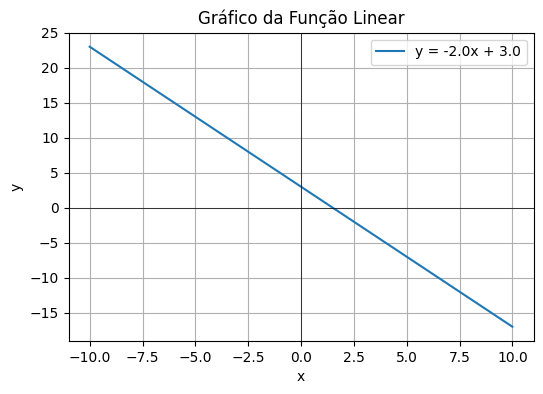

In [83]:
# Crie a função linear usando a função definida anteriormente
funcao_plot = criar_funcao_linear(a, b)

# Gere valores de x para o gráfico
x_vals = np.linspace(-10, 10, 100)

# Calcule os valores de y correspondentes
y_vals = funcao_plot(x_vals)

# Plote a função linear
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label=f'y = {a}x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico da Função Linear')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# Task
Gere dois conjuntos de dados para ajustar os parâmetros de um modelo de Malthus e um modelo Verhulst na área de ecologia de populações. Faça o gráfico de dispersão de cada um desses modelos e insira no gráfico a curva ajustada.

## Gerar dados para o modelo de malthus

### Subtask:
Simular dados de tamanho populacional ao longo do tempo seguindo um crescimento exponencial (modelo de Malthus) com algum ruído aleatório.


**Reasoning**:
Simulate population size data following an exponential growth model with random noise and store it in a pandas DataFrame.



In [91]:
# 1. Defina parâmetros
n_inicial = 100  # Tamanho inicial da população
taxa_crescimento = 0.1   # Taxa de crescimento intrínseca
n_pontos = 50      # Número de pontos no tempo
tempo_final = 20     # Tempo final

# 2. Gere a série temporal
tempo = np.linspace(0, tempo_final, n_pontos)

# 3. Calcule o tamanho populacional teórico (Modelo de Malthus)
populacao_teorica = n_inicial * np.exp(taxa_crescimento * tempo)

# 4. Adicione ruído aleatório
np.random.seed(42) # para reprodutibilidade
ruido = np.random.normal(0, 15, size=n_pontos) # ruído gaussiano com desvio padrão de 15
populacao_observada = populacao_teorica + ruido

# Garanta que os valores observados sejam não negativos
populacao_observada[populacao_observada < 0] = 0


# 5. Crie um DataFrame
df_malthus = pd.DataFrame({
    "Tempo": tempo,
    "Tamanho_Populacao": populacao_observada
})

display(df_malthus.head())

,Tempo,Tamanho_Populacao
0,0.000000,107.450712
1,0.408163,102.092112
2,0.816327,118.221042
3,1.224490,135.871593
4,1.632653,114.222600


## Estimar parâmetros do modelo de malthus

### Subtask:
Ajustar um modelo exponencial aos dados gerados para estimar a taxa de crescimento intrínseca. Isso pode ser feito linearizando o modelo (tomando o logaritmo) e usando regressão linear, ou usando regressão não linear.


**Reasoning**:
Apply a logarithmic transformation to the 'Tamanho_Populacao' column and then fit a linear regression model to estimate the parameters for the Malthus model.



In [92]:
df_malthus['log_Tamanho_Populacao'] = np.log(df_malthus['Tamanho_Populacao'])

# Adjust linear model
X = sm.add_constant(df_malthus['Tempo']) # independent variable
y = df_malthus['log_Tamanho_Populacao'] # dependent variable
model_linear = sm.OLS(y, X).fit()

# Extract parameters
intercept_estimated = model_linear.params[0]
slope_estimated = model_linear.params[1]

# Estimate initial population and growth rate
N0_estimated = np.exp(intercept_estimated)
taxa_crescimento_estimada = slope_estimated

# Print estimated values
print("=== Parâmetros estimados para o Modelo de Malthus (Linearização) ===")
print(f"Tamanho Populacional Inicial Estimado (N0): {N0_estimated:.3f}")
print(f"Taxa de Crescimento Intrínseca Estimada (r): {taxa_crescimento_estimada:.3f}")

=== Parâmetros estimados para o Modelo de Malthus (Linearização) ===
Tamanho Populacional Inicial Estimado (N0): 100.748
Taxa de Crescimento Intrínseca Estimada (r): 0.098


/tmp/ipython-input-3269286419.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_estimated = model_linear.params[0]
/tmp/ipython-input-3269286419.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_estimated = model_linear.params[1]


## Gerar gráfico para o modelo de malthus

### Subtask:
Criar um gráfico de dispersão dos dados simulados e adicionar a curva exponencial ajustada.


**Reasoning**:
Create a scatter plot of the observed data and add the fitted exponential curve to the plot.



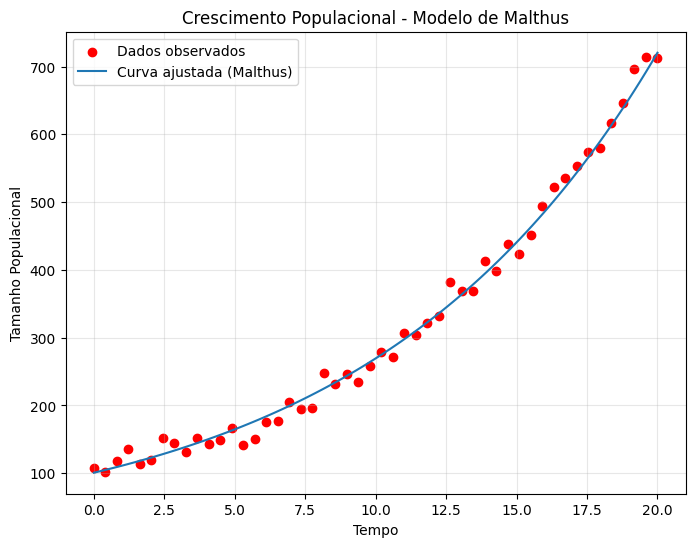

In [93]:
# 1. Create a figure and axes
fig, ax = plt.figure(figsize=(8, 6)), plt.axes()

# 2. Create a scatter plot of the observed data
ax.scatter(df_malthus['Tempo'], df_malthus['Tamanho_Populacao'], label="Dados observados", color="red")

# 3. Generate time values for the fitted curve
tempo_para_curva = np.linspace(df_malthus['Tempo'].min(), df_malthus['Tempo'].max(), 100)

# 4. Calculate the estimated population values for the fitted curve
populacao_estimada = N0_estimated * np.exp(taxa_crescimento_estimada * tempo_para_curva)

# 5. Plot the fitted exponential curve
ax.plot(tempo_para_curva, populacao_estimada, label="Curva ajustada (Malthus)")

# 6. Add labels to the axes
ax.set_xlabel("Tempo")
ax.set_ylabel("Tamanho Populacional")

# 7. Add a title to the plot
ax.set_title("Crescimento Populacional - Modelo de Malthus")

# 8. Add a legend to the plot
ax.legend()

# 9. Add a grid to the plot
ax.grid(alpha=0.3)

# 10. Display the plot
plt.show()

## Gerar dados para o modelo de verhulst

### Subtask:
Simular dados de tamanho populacional ao longo do tempo seguindo um crescimento logístico (modelo de Verhulst), incluindo a capacidade de suporte do ambiente e algum ruído aleatório.


**Reasoning**:
Define the parameters for the Verhulst model simulation and generate the time series and theoretical population values.



In [94]:
# 1. Defina os parâmetros para a simulação do modelo de Verhulst
n_inicial_verhulst = 10  # Tamanho inicial da população
taxa_crescimento_verhulst = 0.5   # Taxa de crescimento intrínseca
capacidade_suporte = 500 # Capacidade de suporte do ambiente
n_pontos_verhulst = 100      # Número de pontos no tempo
tempo_final_verhulst = 50     # Tempo final

# 2. Gere uma série temporal
tempo_verhulst = np.linspace(0, tempo_final_verhulst, n_pontos_verhulst)

# 3. Calcule o tamanho populacional teórico (Modelo de Verhulst)
populacao_teorica_verhulst = capacidade_suporte * n_inicial_verhulst / (n_inicial_verhulst + (capacidade_suporte - n_inicial_verhulst) * np.exp(-taxa_crescimento_verhulst * tempo_verhulst))

# 4. Adicione ruído aleatório
np.random.seed(42) # para reprodutibilidade
ruido_verhulst = np.random.normal(0, 20, size=n_pontos_verhulst) # ruído gaussiano com desvio padrão de 20
populacao_observada_verhulst = populacao_teorica_verhulst + ruido_verhulst

# 5. Garanta que os valores de população observados sejam não negativos
populacao_observada_verhulst[populacao_observada_verhulst < 0] = 0

# 6. Crie um DataFrame pandas
df_verhulst = pd.DataFrame({
    "Tempo": tempo_verhulst,
    "Tamanho_Populacao": populacao_observada_verhulst
})

# 7. Exiba as primeiras linhas do DataFrame resultante
display(df_verhulst.head())

,Tempo,Tamanho_Populacao
0,0.000000,19.934283
1,0.505051,10.033897
2,1.010101,29.309526
3,1.515152,51.318895
4,2.020202,21.849271


## Estimar parâmetros do modelo de verhulst

### Subtask:
Ajustar um modelo logístico (não linear) aos dados gerados para estimar a taxa de crescimento e a capacidade de suporte. Isso geralmente requer métodos de otimização para regressão não linear.


**Reasoning**:
Import the necessary function for curve fitting and define the logistic model function.



In [95]:
from scipy.optimize import curve_fit

def verhulst_model(t, K, r):
    """
    Logistic growth model (Verhulst).

    Args:
        t: Time.
        K: Carrying capacity.
        r: Intrinsic growth rate.

    Returns:
        Population size at time t.
    """
    N0 = df_verhulst["Tamanho_Populacao"].iloc[0] # Use the first observed value as initial population
    return K * N0 / (N0 + (K - N0) * np.exp(-r * t))


**Reasoning**:
Fit the defined logistic model to the generated data and extract the estimated parameters.



In [96]:
# Use curve_fit to fit the Verhulst model to the data
# Provide initial guesses for K and r
# Initial guess for K can be the maximum population observed
# Initial guess for r can be estimated from the Malthus growth phase or simply a small positive value
initial_guess = [df_verhulst["Tamanho_Populacao"].max(), 0.1]

params_verhulst, covariance = curve_fit(verhulst_model, df_verhulst["Tempo"], df_verhulst["Tamanho_Populacao"], p0=initial_guess)

# Extract the estimated parameters
K_estimated = params_verhulst[0]
r_estimated = params_verhulst[1]

# Print the estimated parameters
print("\n=== Parâmetros estimados para o Modelo de Verhulst (Regressão Não Linear) ===")
print(f"Capacidade de Suporte Estimada (K): {K_estimated:.3f}")
print(f"Taxa de Crescimento Intrínseca Estimada (r): {r_estimated:.3f}")


=== Parâmetros estimados para o Modelo de Verhulst (Regressão Não Linear) ===
Capacidade de Suporte Estimada (K): 500.874
Taxa de Crescimento Intrínseca Estimada (r): 0.406


## Gerar gráfico para o modelo de verhulst

### Subtask:
Criar um gráfico de dispersão dos dados simulados e adicionar a curva logística ajustada.


**Reasoning**:
Create a scatter plot of the simulated data and add the fitted logistic curve, as well as labels, title, legend, and grid.



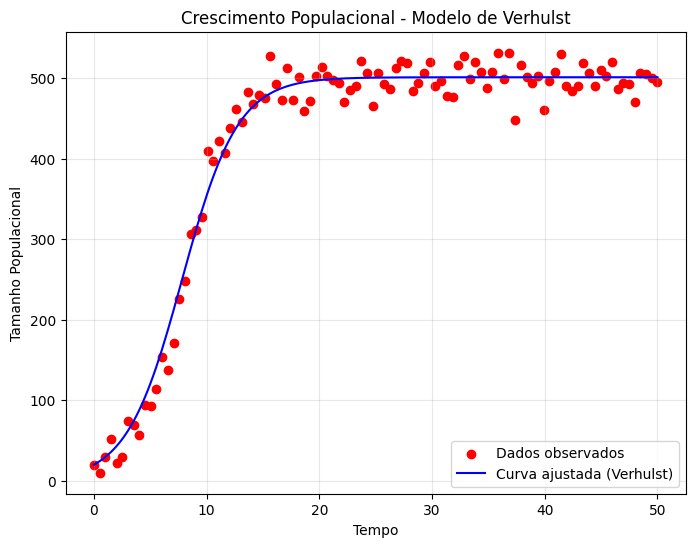

In [97]:
# 1. Crie uma figura e eixos para o gráfico usando matplotlib.pyplot.
plt.figure(figsize=(8, 6))

# 2. Crie um gráfico de dispersão dos dados de população observados
plt.scatter(df_verhulst['Tempo'], df_verhulst['Tamanho_Populacao'], label="Dados observados", color="red")

# 3. Gere uma sequência de valores de tempo para a curva ajustada
tempo_para_curva_verhulst = np.linspace(df_verhulst['Tempo'].min(), df_verhulst['Tempo'].max(), 200)

# 4. Calcule os valores de população estimados para a curva ajustada
populacao_estimada_verhulst = verhulst_model(tempo_para_curva_verhulst, K_estimated, r_estimated)

# 5. Plote a curva logística ajustada
plt.plot(tempo_para_curva_verhulst, populacao_estimada_verhulst, label="Curva ajustada (Verhulst)", color="blue")

# 6. Adicione rótulos adequados para os eixos x e y
plt.xlabel("Tempo")
plt.ylabel("Tamanho Populacional")

# 7. Adicione um título ao gráfico
plt.title("Crescimento Populacional - Modelo de Verhulst")

# 8. Adicione uma legenda ao gráfico
plt.legend()

# 9. Adicione uma grade ao gráfico
plt.grid(alpha=0.3)

# 10. Exiba o gráfico
plt.show()

## Summary:

### Data Analysis Key Findings

*   For the Malthus model, the estimated initial population size was approximately 100.748, and the estimated intrinsic growth rate was approximately 0.098, obtained through linearizing the model and using linear regression.
*   The plot for the Malthus model shows that the fitted exponential curve closely follows the trend of the simulated data, which exhibits exponential growth with some noise.
*   For the Verhulst model, the estimated carrying capacity was approximately 500.874, and the estimated intrinsic growth rate was approximately 0.406, obtained by fitting a non-linear logistic model using `scipy.optimize.curve_fit`.
*   The plot for the Verhulst model shows the simulated data points following a logistic growth pattern, leveling off around the estimated carrying capacity, and the fitted logistic curve accurately represents this trend.

### Insights or Next Steps

*   The fitting process successfully estimated the key parameters for both the Malthus and Verhulst models from simulated data, demonstrating the applicability of these methods for analyzing population growth patterns.
*   Further analysis could involve comparing the goodness-of-fit for each model to determine which better describes a given real-world population dataset, considering factors like the presence of environmental limitations.
